# Disease Symptoms and Patient Profile Dataset Analysis

This dataset provides valuable insights into diseases by linking symptoms, patient demographics, and health indicators. It includes information on fever, cough, fatigue, and difficulty breathing, along with details like age, gender, blood pressure, and cholesterol levels.
Whether you're a medical researcher, healthcare professional, or data enthusiast, this dataset can help you analyze symptom patterns, identify risk factors, and uncover hidden trends in medical conditions. Use it to gain deeper insights into disease symptoms and patient profiles, contributing to better healthcare understanding and decision-making.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/disease_symptom.csv')

In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [ ]:
df.shape

(349, 10)

In [ ]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

1. **Disease**: Represents the type of disease affecting the patient. This could be categorical (e.g., COVID-19, pneumonia, flu) or binary (disease present or not).  

2. **Fever**: Indicates whether the patient has an elevated body temperature, which is a common symptom of infections. It can be recorded as a binary variable (Yes/No) or as a continuous variable (body temperature in °C or °F).  

3. **Cough**: Represents whether the patient has a cough, which can be a key symptom for respiratory diseases. It can be binary (Yes/No) or categorical (e.g., dry cough, wet cough).  

4. **Fatigue**: Indicates if the patient is experiencing tiredness or weakness. It can be binary (Yes/No) or measured on a scale (e.g., mild, moderate, severe).  

5. **Difficulty Breathing**: Refers to shortness of breath or respiratory distress. It can be a binary variable or measured using a clinical score (e.g., respiratory rate, oxygen saturation).  

6. **Age**: The patient’s age, usually recorded as a continuous numerical value. Age is an important risk factor in many diseases.  

7. **Gender**: Represents the patient’s sex (e.g., Male, Female, Other). It can be a categorical variable.  

8. **Blood Pressure**: Measures the pressure of blood against artery walls. It can be given as two values: systolic (higher value) and diastolic (lower value), recorded in mmHg. It helps assess cardiovascular health.  

9. **Cholesterol Level**: Represents the amount of cholesterol in the blood. It can be recorded as total cholesterol, LDL (bad cholesterol), HDL (good cholesterol), or triglycerides. It is an important risk factor for heart diseases.  

10. **Outcome Variable**: This represents the final result of interest, such as whether the patient recovered, deteriorated, or passed away. In a classification problem, it may be binary (e.g., Disease Present/Absent, Survival/Death) or multi-class (e.g., Normal, Mild, Severe).  

In [ ]:
df.duplicated().sum()

np.int64(49)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    object
 2   Cough                 300 non-null    object
 3   Fatigue               300 non-null    object
 4   Difficulty Breathing  300 non-null    object
 5   Age                   300 non-null    int64 
 6   Gender                300 non-null    object
 7   Blood Pressure        300 non-null    object
 8   Cholesterol Level     300 non-null    object
 9   Outcome Variable      300 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.8+ KB


In [ ]:
df.describe()

,Age
count,300.000000
mean,45.756667
std,12.596548
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

Numerical type columns:
Index(['Age'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
Non-Categorical Features: ['Disease']
Discrete Features: []
Continuous Features: ['Age']


In [ ]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Fever
['Yes' 'No']

Cough
['No' 'Yes']

Fatigue
['Yes' 'No']

Difficulty Breathing
['Yes' 'No']

Gender
['Female' 'Male']

Blood Pressure
['Low' 'Normal' 'High']

Cholesterol Level
['Normal' 'Low' 'High']

Outcome Variable
['Positive' 'Negative']



In [ ]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Fever
Fever
No     157
Yes    143
Name: count, dtype: int64

Cough
Cough
No     160
Yes    140
Name: count, dtype: int64

Fatigue
Fatigue
Yes    212
No      88
Name: count, dtype: int64

Difficulty Breathing
Difficulty Breathing
No     227
Yes     73
Name: count, dtype: int64

Gender
Gender
Female    152
Male      148
Name: count, dtype: int64

Blood Pressure
Blood Pressure
High      143
Normal    139
Low        18
Name: count, dtype: int64

Cholesterol Level
Cholesterol Level
High      140
Normal    130
Low        30
Name: count, dtype: int64

Outcome Variable
Outcome Variable
Positive    157
Negative    143
Name: count, dtype: int64



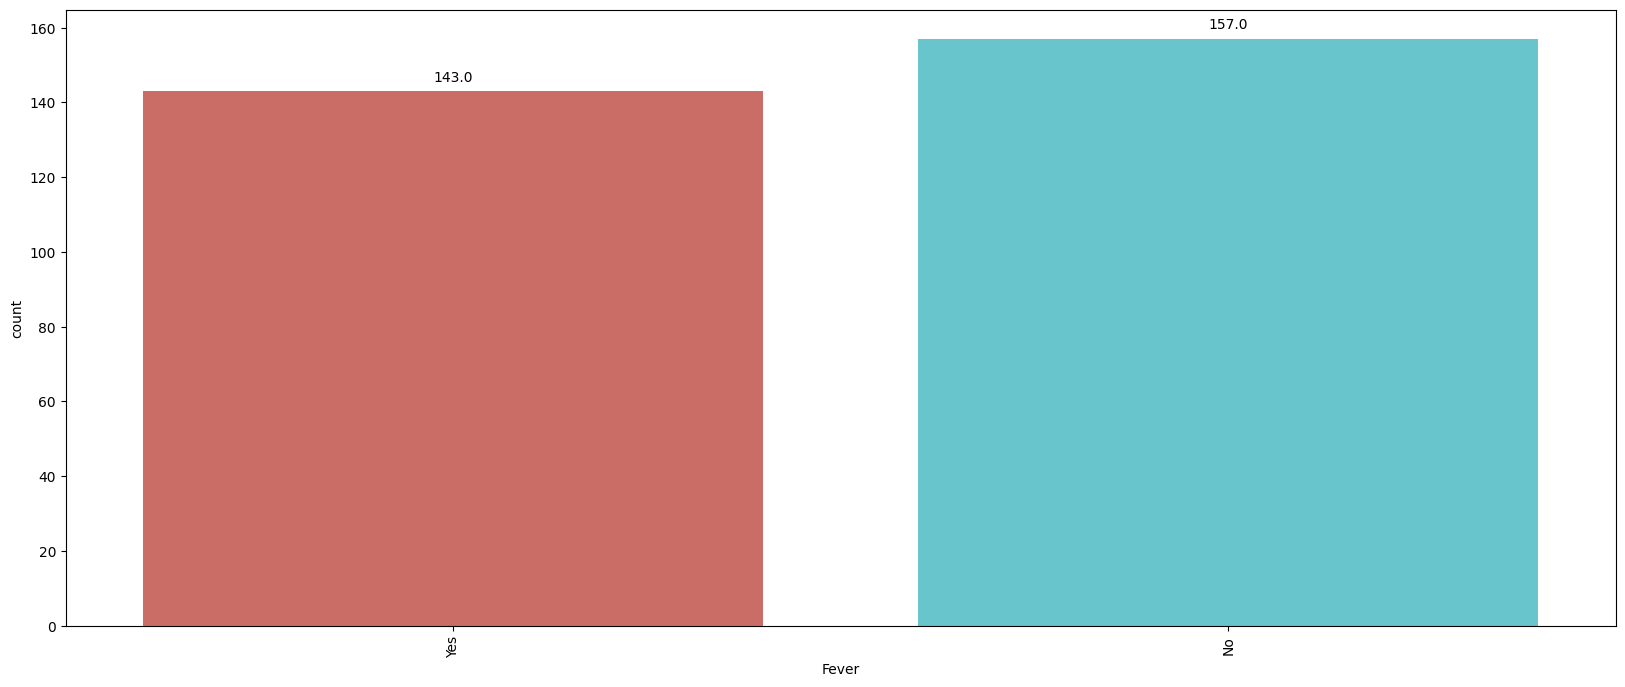

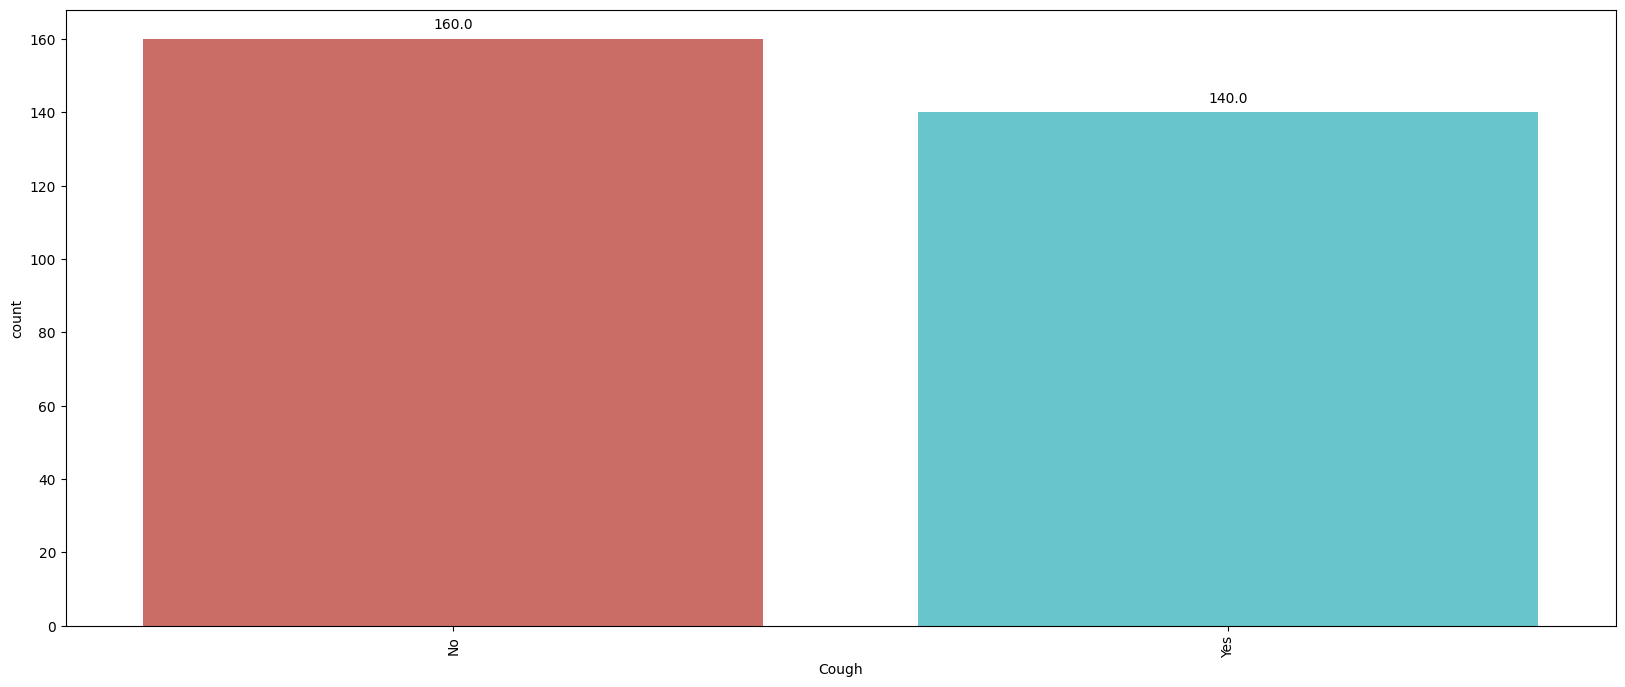

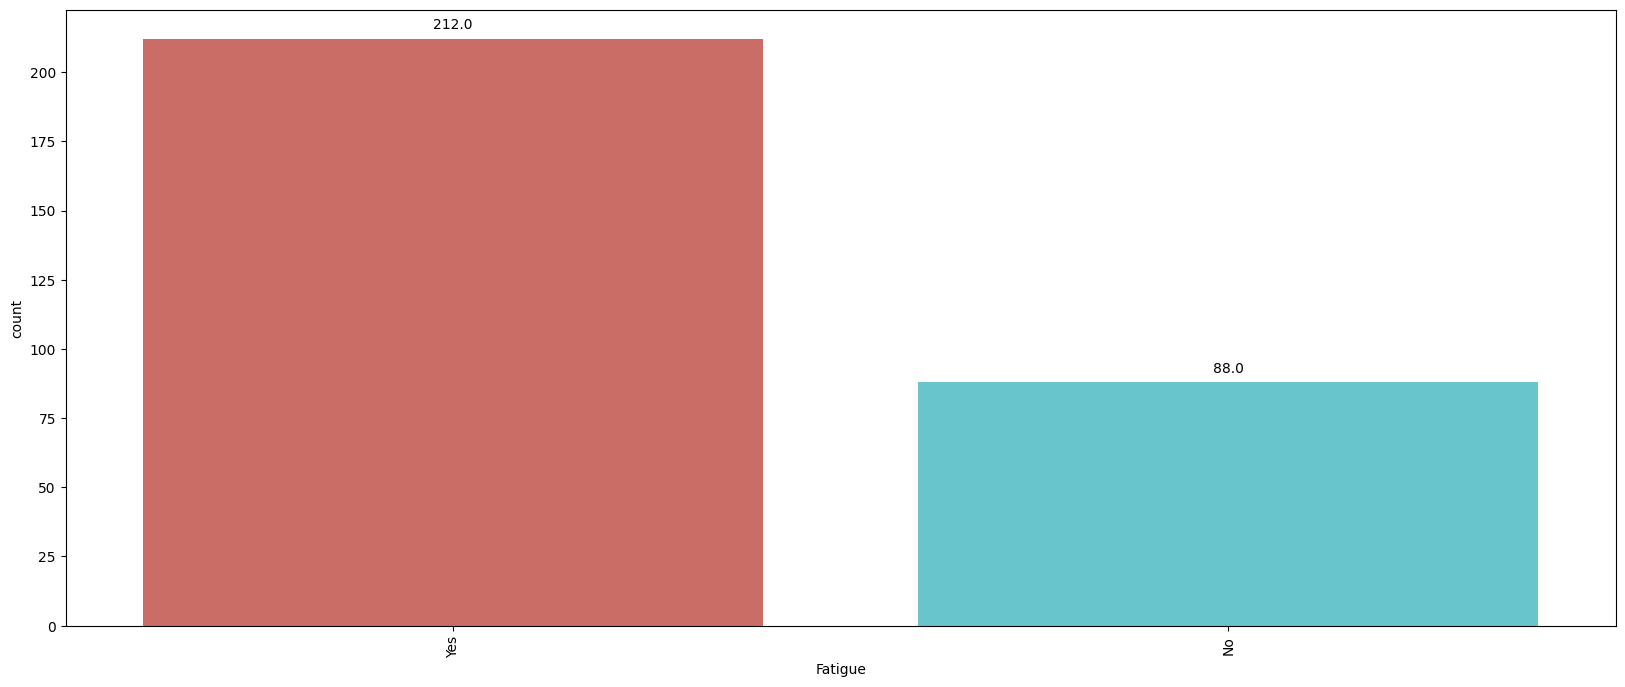

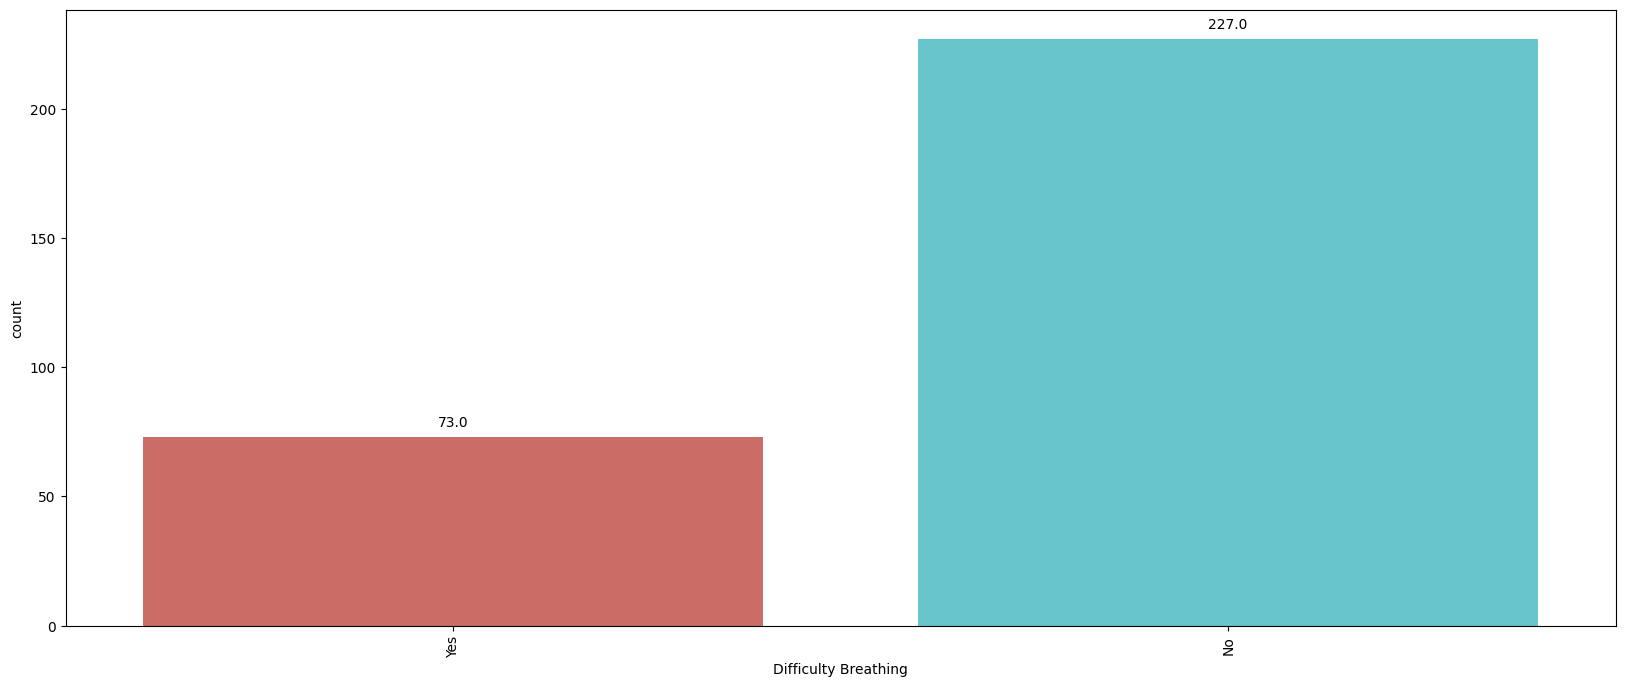

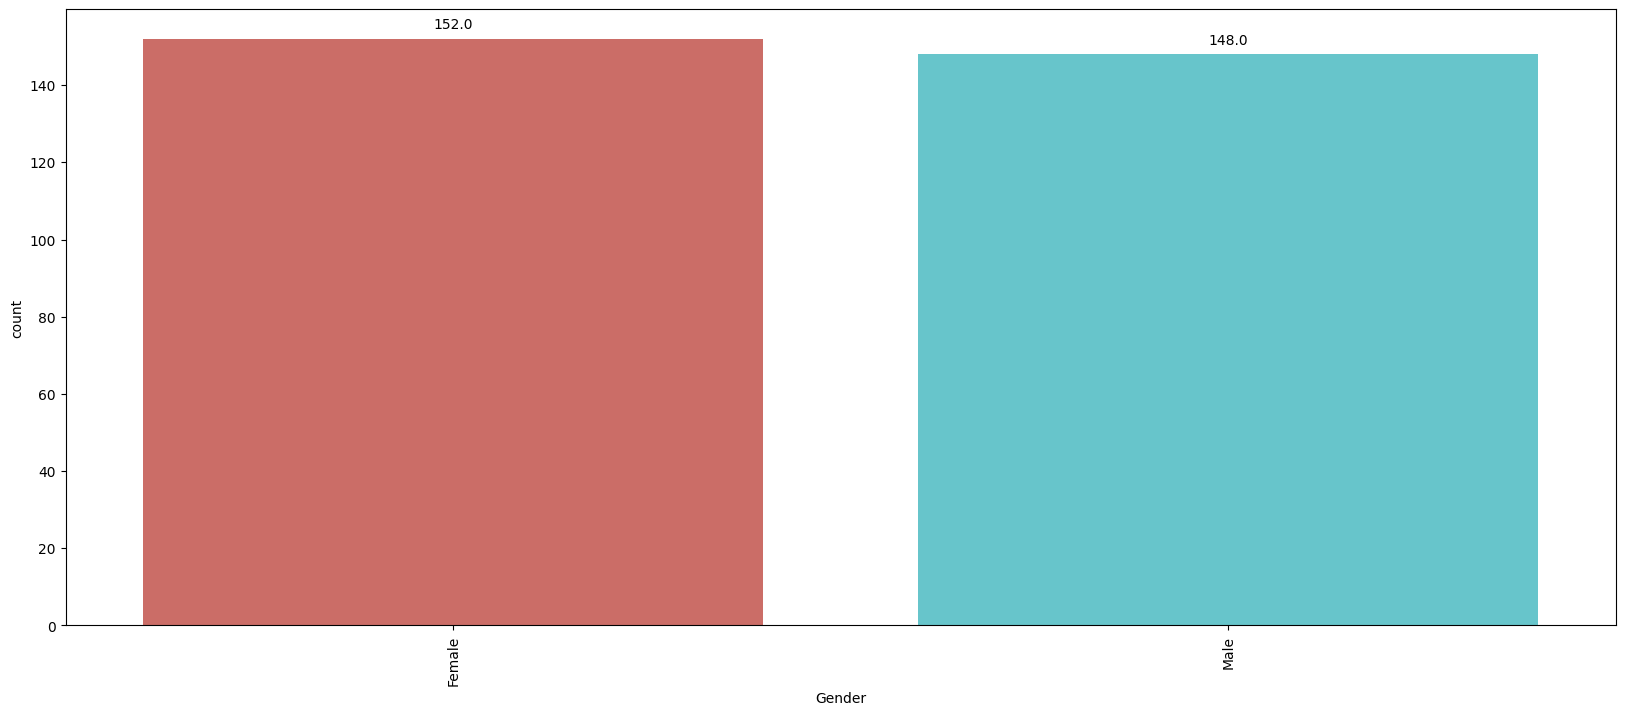

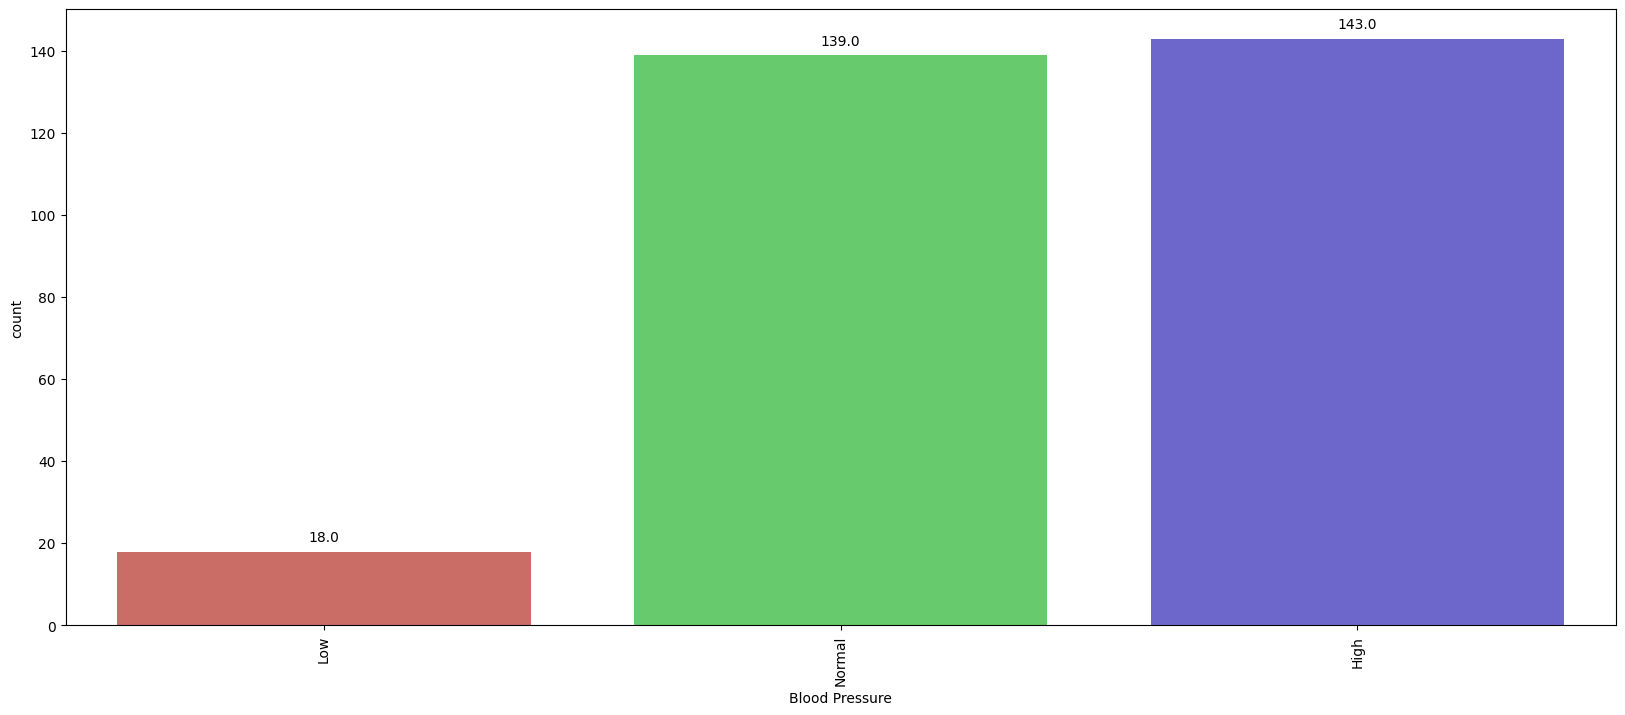

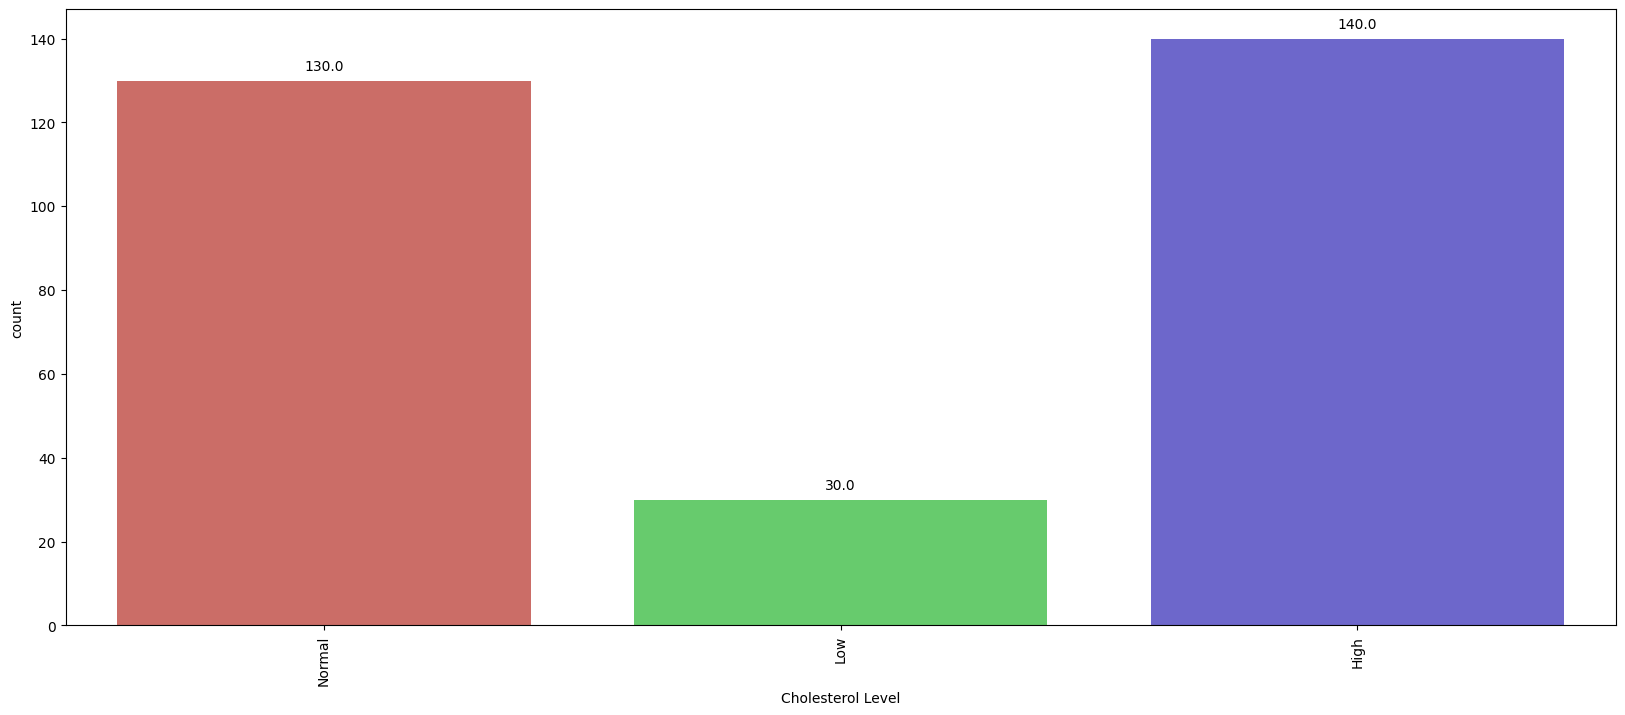

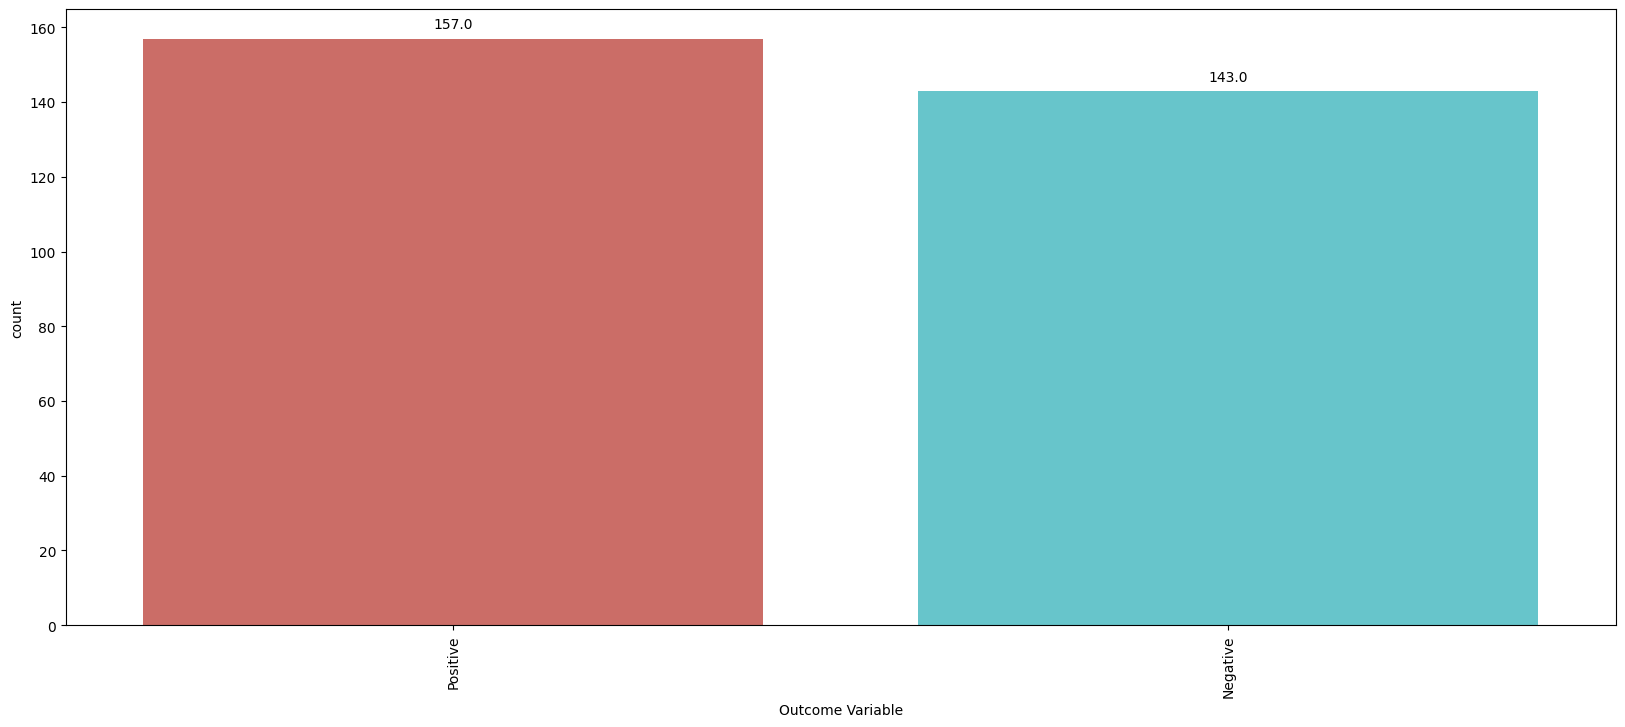

In [ ]:
for i in categorical:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

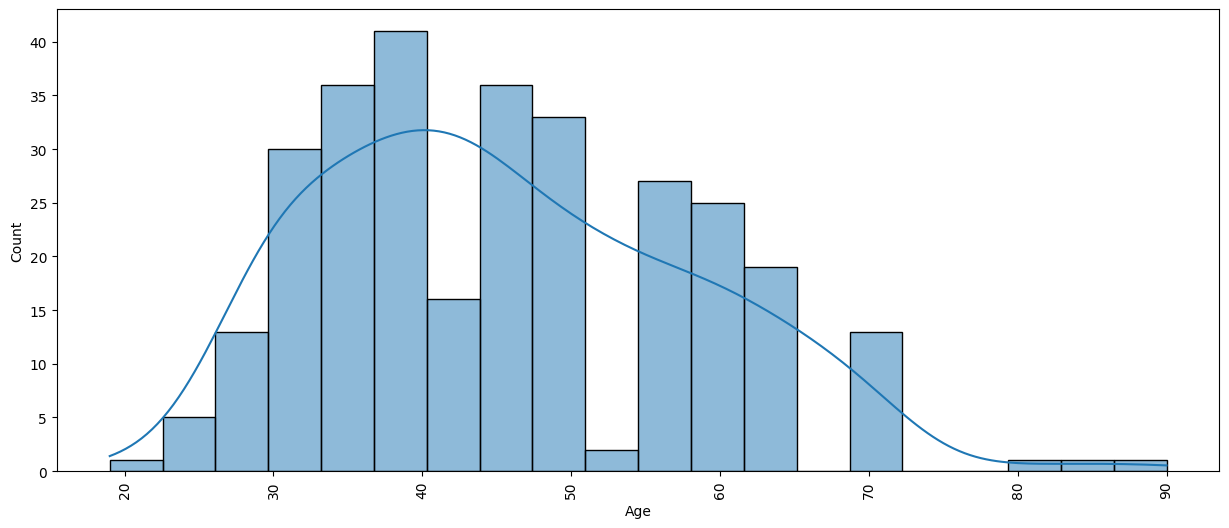

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

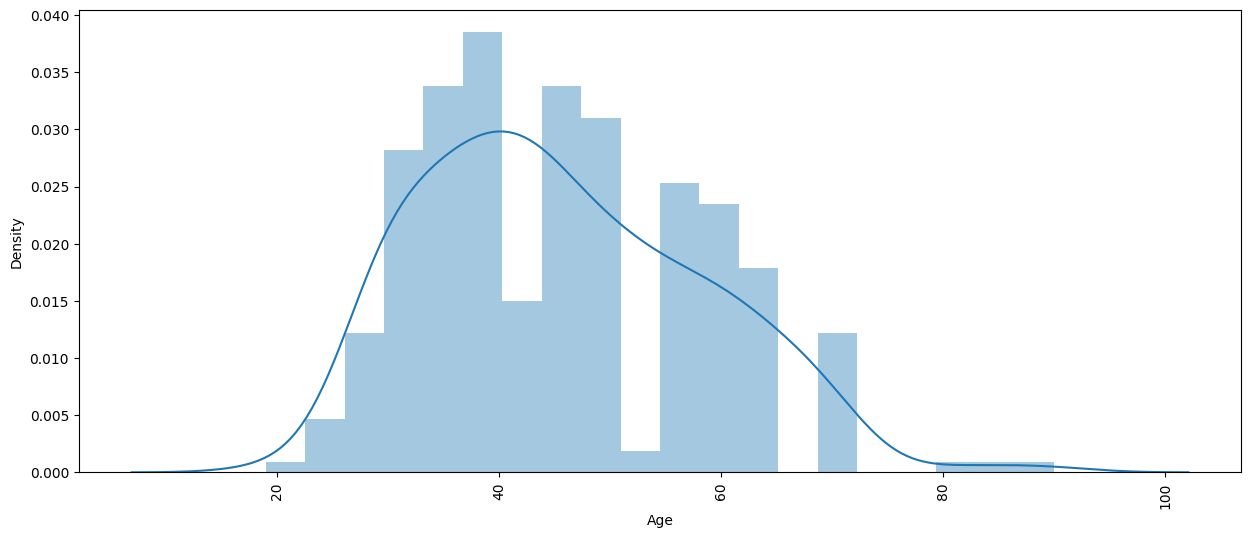

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

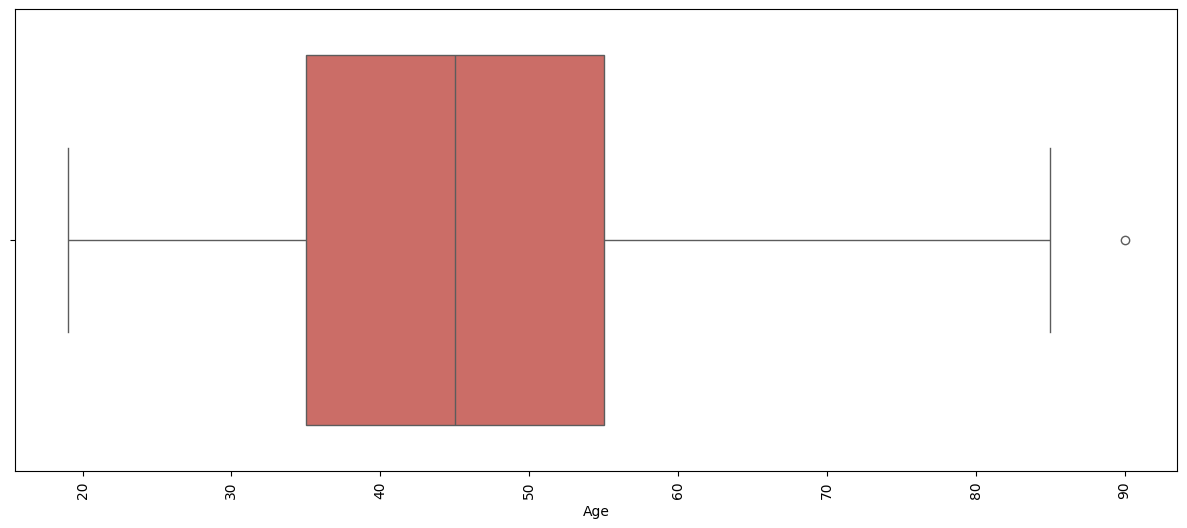

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

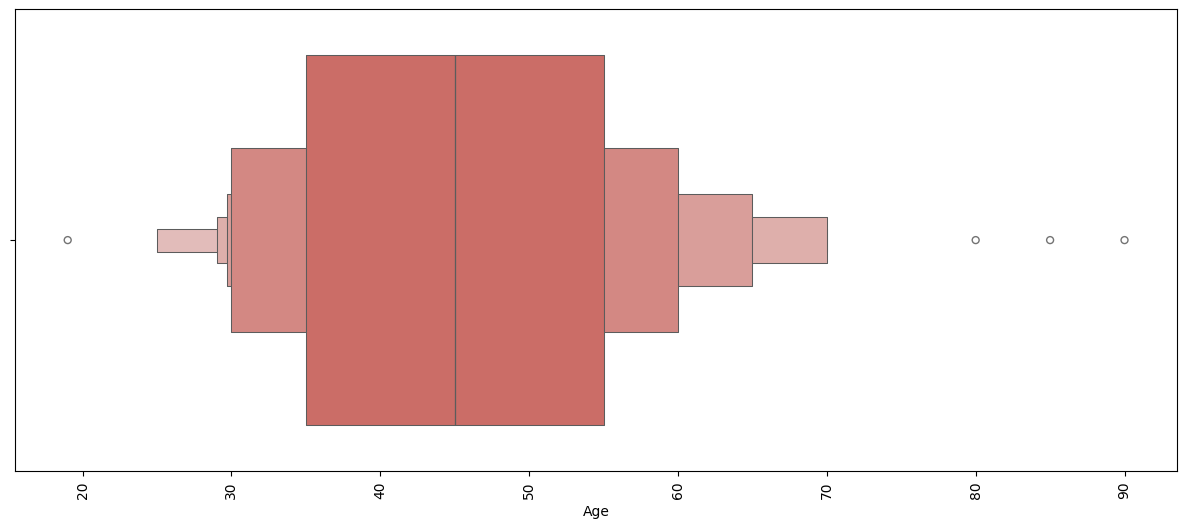

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

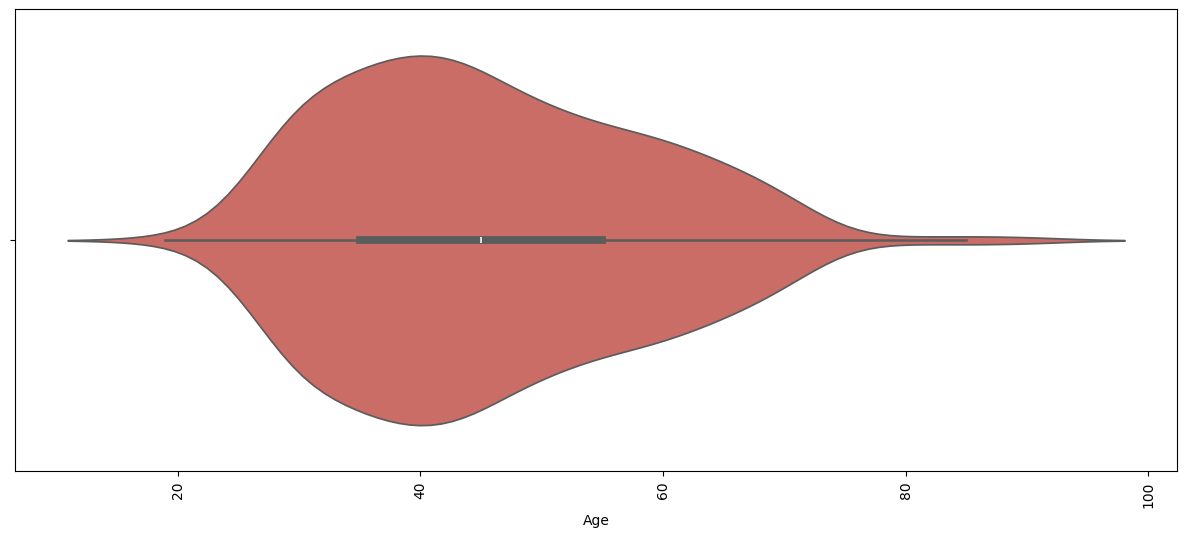

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

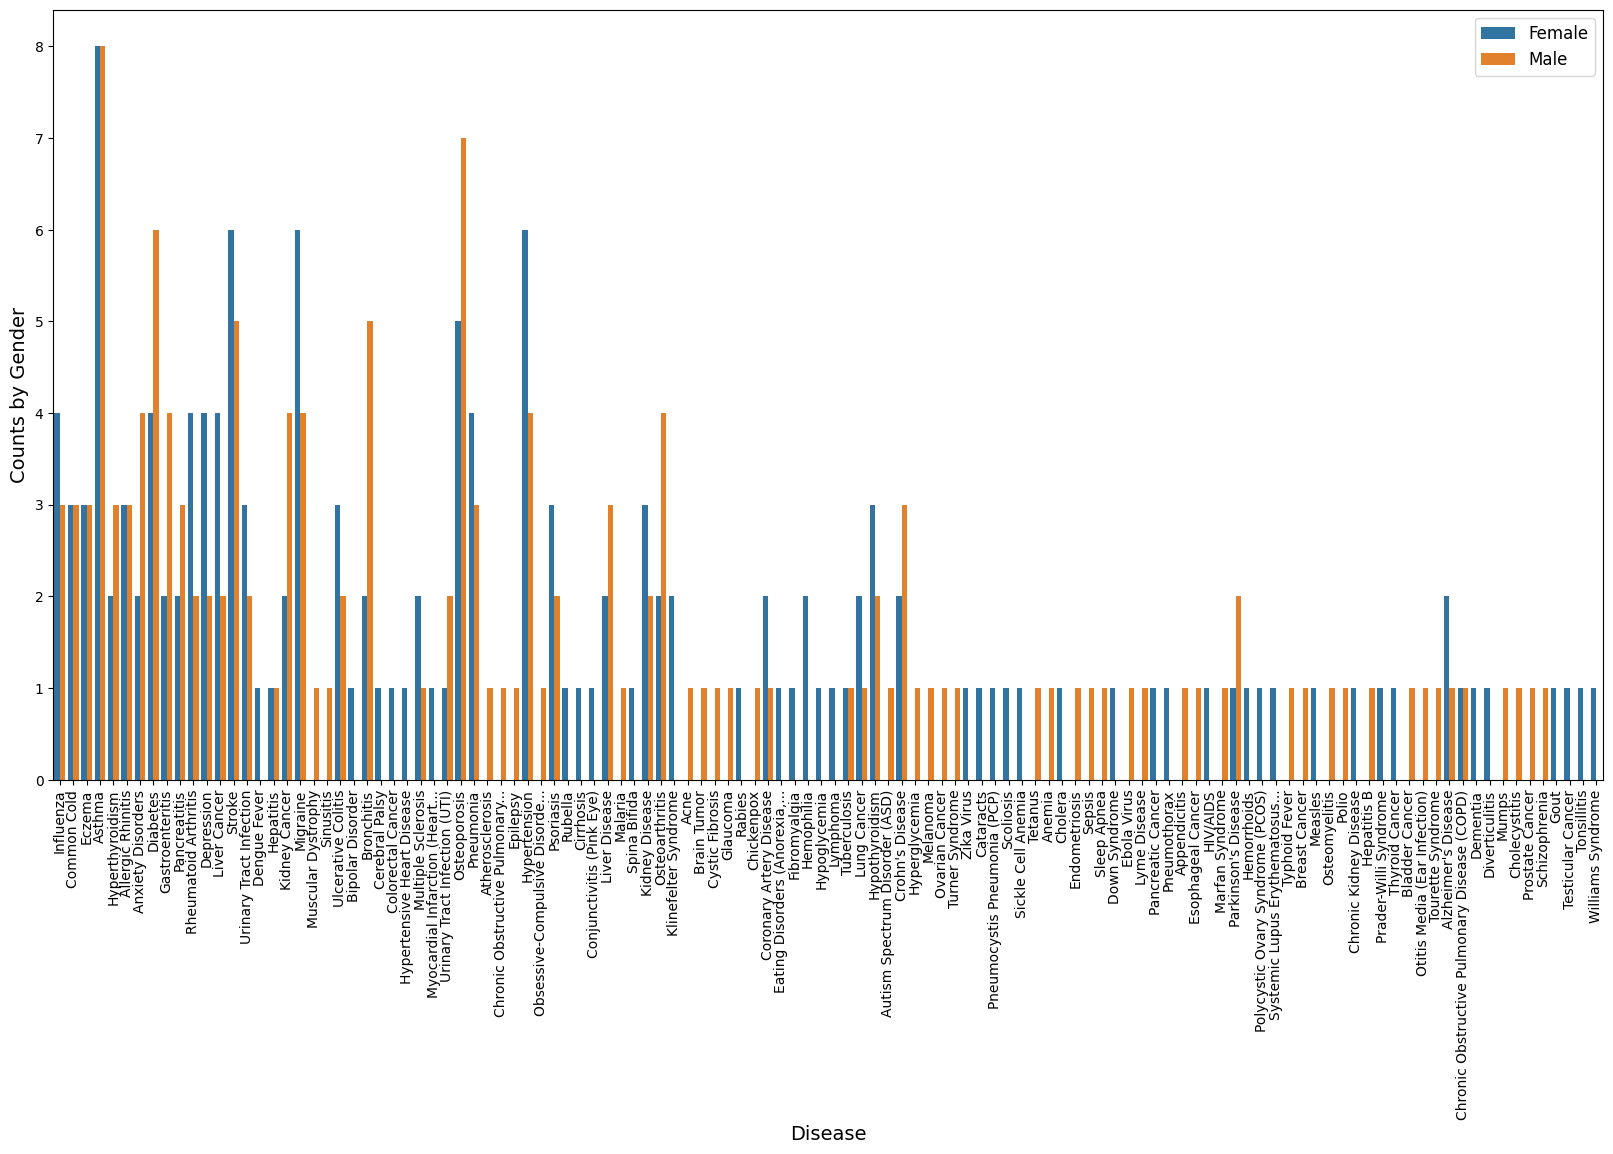

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['Disease'],hue = df['Gender'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Counts by Gender', fontsize=14)
plt.legend(fontsize=12)
plt.show()

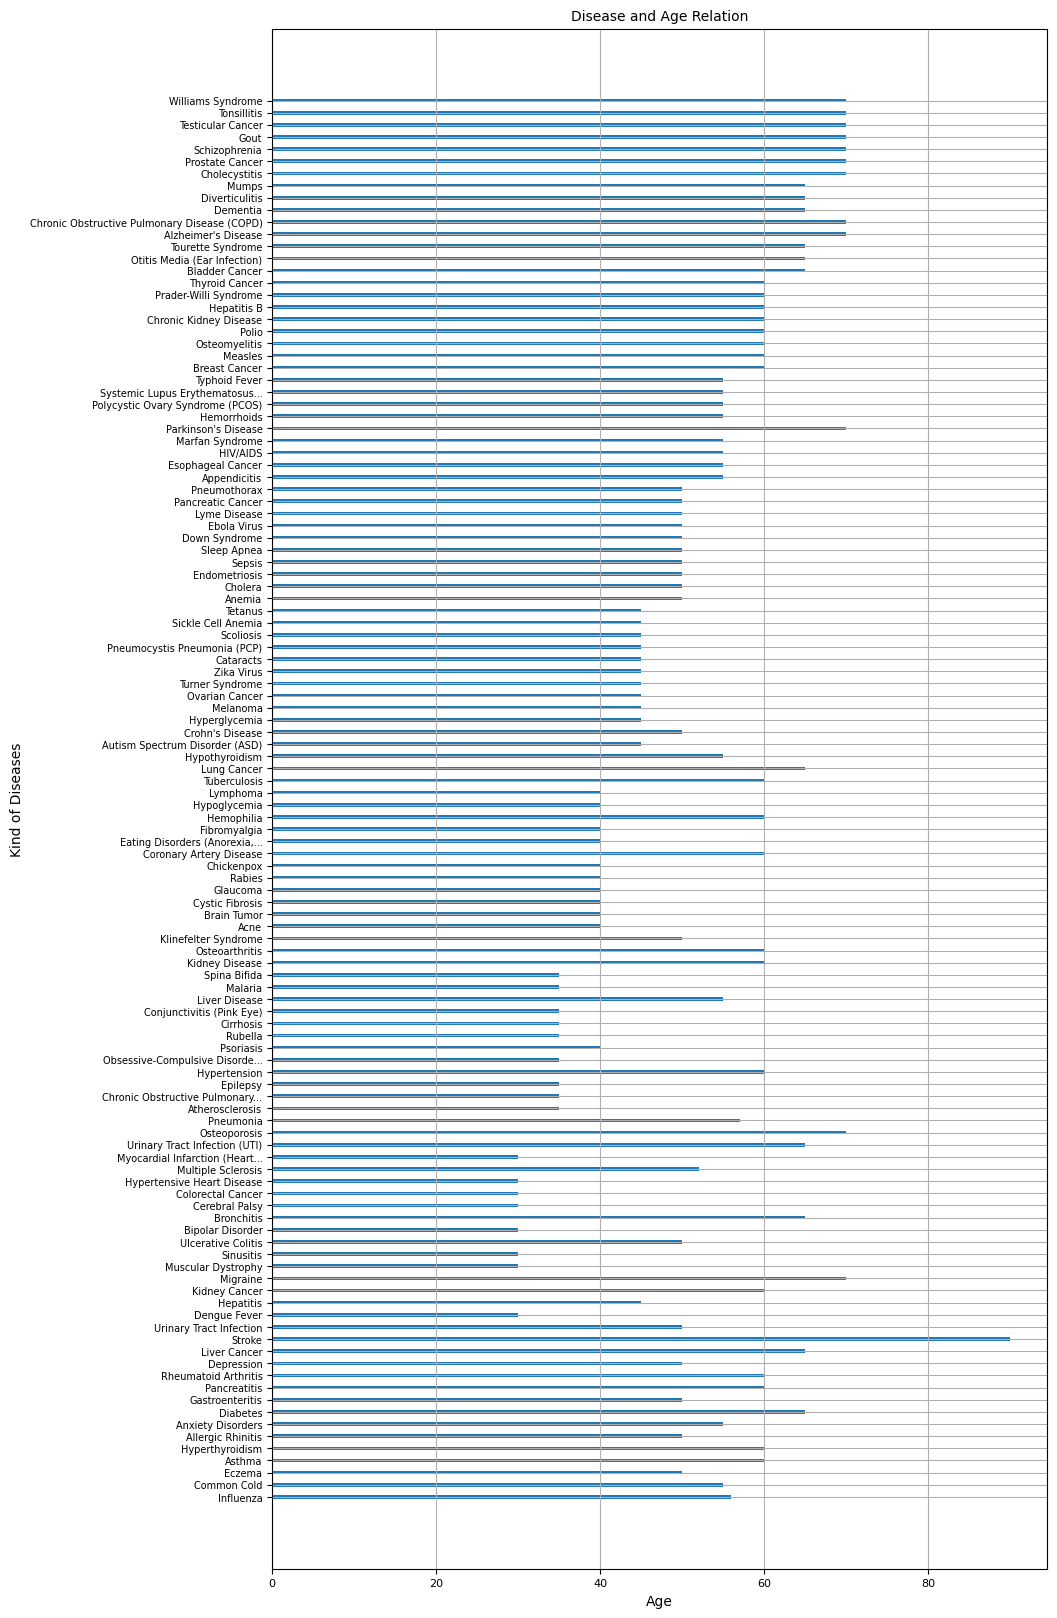

In [ ]:
plt.figure(figsize=(10, 20))
plt.barh(df['Disease'], df['Age'], height=0.3, align='center')
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Kind of Diseases', fontsize=10)
plt.title('Disease and Age Relation', fontsize=10)
plt.grid()
plt.show()

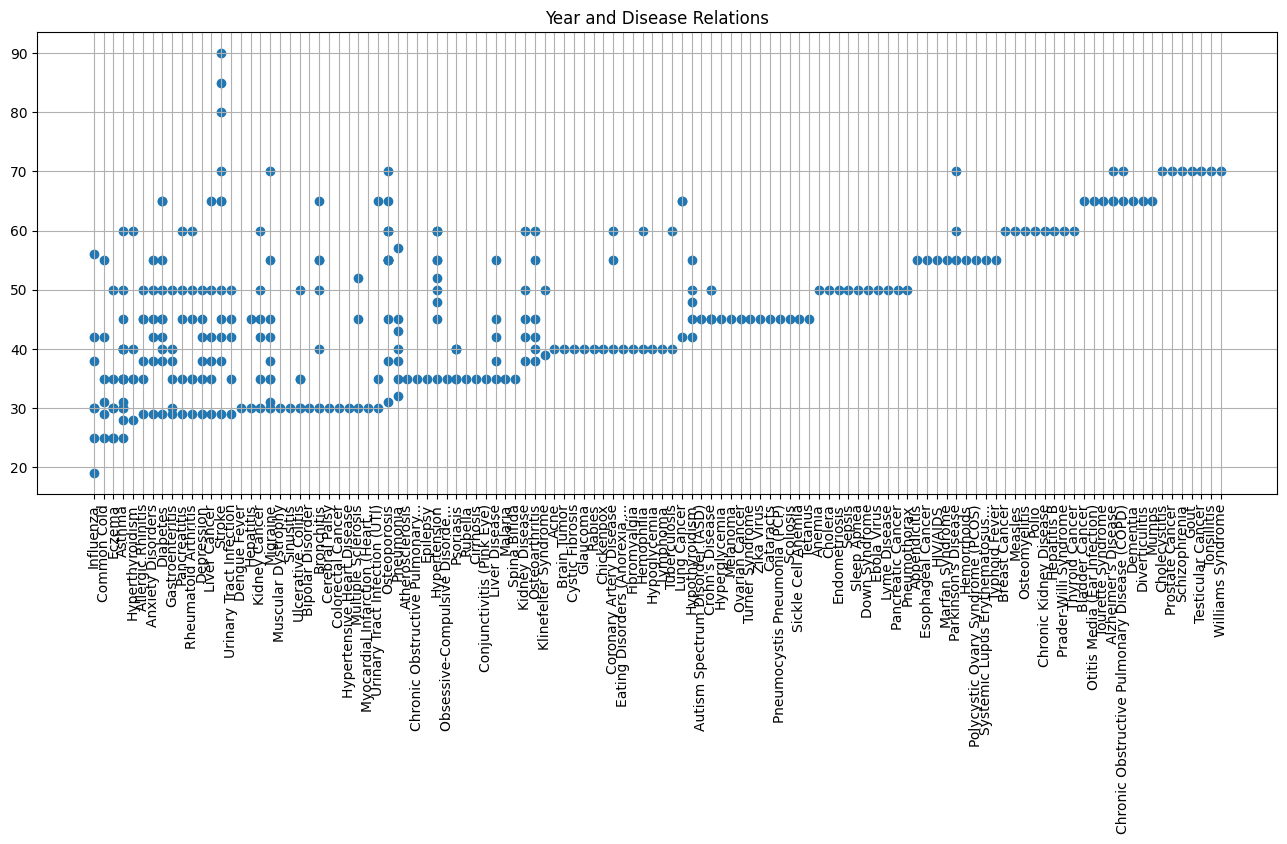

In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(df['Disease'],df['Age'])
plt.xticks(rotation=90)
plt.title('Year and Disease Relations')
plt.grid()
plt.show()

In [ ]:
pivot_table = df.pivot_table(index=['Disease'], values=['Age'], aggfunc=['mean', 'count'])
print(pivot_table)

                                    mean count
                                     Age   Age
Disease                                       
Acne                           40.000000     1
Allergic Rhinitis              40.333333     6
Alzheimer's Disease            66.666667     3
Anemia                         50.000000     1
Anxiety Disorders              43.166667     6
...                                  ...   ...
Ulcerative Colitis             36.000000     5
Urinary Tract Infection        40.200000     5
Urinary Tract Infection (UTI)  43.333333     3
Williams Syndrome              70.000000     1
Zika Virus                     45.000000     1

[116 rows x 2 columns]


In [ ]:
one_hot_features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 'Cholesterol Level']
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Outcome Variable'] = label_encoder.fit_transform(df['Outcome Variable'])

In [ ]:
one_hot_features = ['Disease']
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

In [ ]:
df

,Age,Gender,Outcome Variable,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,...,Disease_Tonsillitis,Disease_Tourette Syndrome,Disease_Tuberculosis,Disease_Turner Syndrome,Disease_Typhoid Fever,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus
0,19,0,1,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,25,0,0,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,25,0,0,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,25,1,1,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,25,0,1,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,70,0,1,True,True,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
342,70,0,1,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
343,80,0,1,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
345,85,1,1,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        29
           1       0.70      0.68      0.69        31

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        29
           1       0.70      0.74      0.72        31

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7833333333333333
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        29
           1       0.74      0.90      0.81        31

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg       0.80      0.78      0.78        60

